# Evaluation after Model Compression

This notebook evaluates models on emotions valudation set

## Compression tecniques:
1. **Pruning** - model layers pruning
2. **Quantization** - unint8 quantization


## Load Data


### Mount and unzip

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp -r gdrive/MyDrive/__PHd_2025/courses/2026a/NLP/data . # change for your location
!unzip data/data.zip
!mv *csv data/.
!ls data/

Mounted at /content/gdrive
cp: cannot open 'gdrive/MyDrive/__PHd_2025/courses/2026a/NLP/data/train.gsheet' for reading: Operation not supported
Archive:  data/data.zip
  inflating: validation.csv          
  inflating: train.csv               
data.zip  train.csv  validation.csv


### Load and take a look

In [3]:
# Load training data
import pandas as pd

df_v = pd.read_csv('./data/validation.csv')

print(f"Dataset shape: val: {df_v.shape}")
print(f"Columns: train: val: {list(df_v.columns)}")

print("Validation labels distribution:")
print(df_v.label.value_counts().sort_index())

Dataset shape: val: (2000, 2)
Columns: train: val: ['text', 'label']
Validation labels distribution:
label
0    550
1    704
2    178
3    275
4    212
5     81
Name: count, dtype: int64


## Code from repo

In [4]:
!rm -rf ModelCompression_NLP/ # remove previous version

#if you are clonning a public version, use:
!git clone https://github.com/natalyasegal/ModelCompression_NLP.git

import sys
sys.path.append('/content/ModelCompression_NLP')   # add package root to Python path

#from utils.swap import swap_categories
from eval.eval import evaluate_all_versions_from_outputs

Cloning into 'ModelCompression_NLP'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 85.37 KiB | 21.34 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Copy models

In [5]:
# copy only the parts you need

!ls gdrive/MyDrive/__PHd_2025/courses/2026a/NLP/outputs_part2
!mkdir outputs_part2
!cp -r gdrive/MyDrive/__PHd_2025/courses/2026a/NLP/outputs_part2/BEST_PRUNED outputs_part2/.
!ls

BEST_INT8_CPU			  distilroberta-base	summary.json
BEST_PRUNED			  model_comparison.csv
cardiffnlp__twitter-roberta-base  roberta-base
data  gdrive  ModelCompression_NLP  outputs_part2  sample_data


## Evaluation

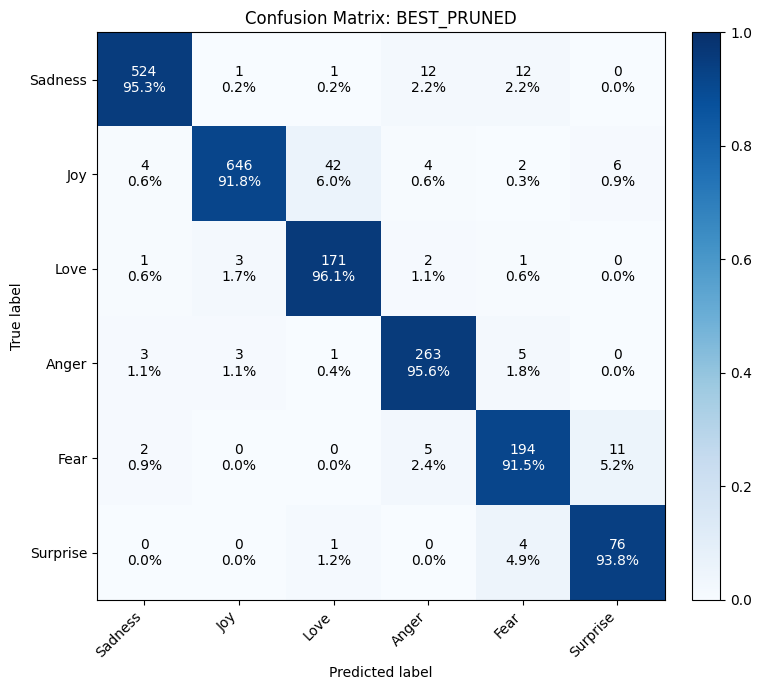


=== MODEL COMPARISON (CPU) ===
 model_name  model_size_mb  inference_ms_per_sample  macro_f1  balanced_accuracy    kappa  accuracy device_used                      path   f1_c0   acc_c0  f1_c1   acc_c1   f1_c2   acc_c2    f1_c3   acc_c3    f1_c4   acc_c4    f1_c5   acc_c5
BEST_PRUNED    2693.931635                 9.043128  0.916735           0.940124 0.918069     0.937         cpu outputs_part2/BEST_PRUNED 0.96679 0.952727 0.9521 0.917614 0.86802 0.960674 0.937611 0.956364 0.902326 0.915094 0.873563 0.938272

Saved CSV to: outputs_part2/model_comparison.csv


,model_name,model_size_mb,inference_ms_per_sample,macro_f1,balanced_accuracy,kappa,accuracy,device_used,path,f1_c0,acc_c0,f1_c1,acc_c1,f1_c2,acc_c2,f1_c3,acc_c3,f1_c4,acc_c4,f1_c5,acc_c5
0,BEST_PRUNED,2693.931635,9.043128,0.916735,0.940124,0.918069,0.937,cpu,outputs_part2/BEST_PRUNED,0.96679,0.952727,0.9521,0.917614,0.86802,0.960674,0.937611,0.956364,0.902326,0.915094,0.873563,0.938272


In [7]:
import os
outputs_dir = "outputs_part2" #will run on all the model in this dir
evaluate_all_versions_from_outputs(
         outputs_dir=outputs_dir,
         df_v=df_v,
         text_col="text",
         label_col="label",
         num_labels=6,
         device="cpu",
         max_length=128,
         batch_size=32,
         save_csv_path=os.path.join(outputs_dir, "model_comparison.csv"),
         #class_names=["class0","class1","class2","class3","class4","class5"],
         class_names=["Sadness","Joy","Love","Anger","Fear","Surprise"],
         save_confusion_matrices=True,
         show_confusion_matrices=True
  )